# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [19]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Dataset yang digunakan berasal dari link berikut: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Mengecek jumlah kolom dan tipe kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Diketahui bahwa dataset yang digunakan memiliki 13 kolom dengan 10 kolom bertipe integer dan 3 kolom bertipe object. Rincian kolom pada dataset adalah sebagai berikut:

- `loan_id`: ID unik untuk setiap pinjaman.

- `no_of_dependents`: Jumlah tanggungan dari pemohon pinjaman.

- `education`: Kualifikasi pendidikan pemohon (Lulusan atau Tidak Lulusan).

- `self_employed`: Status pekerjaan pemohon (Ya atau Tidak bekerja mandiri/wiraswasta).

- `income_annum`: Pendapatan tahunan pemohon (dalam mata uang).

- `loan_amount`: Total jumlah pinjaman yang diminta.

- `loan_term`: Lama waktu pinjaman (dalam bulan).

- `cibil_score`: Skor kredit (CIBIL) dari pemohon.

- `residential_assets_value`: Nilai aset tempat tinggal yang dimiliki.

- `commercial_assets_value`: Nilai aset komersial yang dimiliki.

- `luxury_assets_value`: Nilai aset mewah yang dimiliki.

- `bank_asset_value`: Nilai aset yang dimiliki dalam bentuk simpanan bank.

- `loan_status`: Variabel target yang menunjukkan apakah pinjaman Disetujui atau Ditolak.

In [4]:
# Mengecek jumlah nilai null dari setiap kolom
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
# Mengecek data duplikat
df.duplicated().sum()

np.int64(0)

In [6]:
# Menampilkan deskripsi statistik dataset yang digunakan
df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


Dari hasil deskripsi statistik, ditemukan keanehan pada nilai minimum kolom `residential_assets_value`, yaitu berupa nilai negatif. Oleh karena itu, perlu dilakukan pemeriksaan lebih lanjut untuk mengetahui jumlah baris yang memiliki nilai negatif pada kolom tersebut.

In [7]:
# Menghitung jumlah kolom yang minus
(df[' residential_assets_value'] < 0).sum()


np.int64(28)

Ditemukan sebanyak 28 baris dari total data yang memiliki nilai negatif. Meskipun secara umum nilai aset diharapkan bernilai positif, tidak terdapat keterangan eksplisit dari sumber dataset mengenai apakah nilai negatif ini merupakan kesalahan pencatatan atau bagian dari kasus nyata (misalnya dalam konteks tertentu seperti **aset bersih negatif akibat liabilitas atau kondisi keuangan bermasalah**).

Karena hal tersebut nilai negatif pada kolom `residential_assets_value` akan tetap dipertahankan dalam dataset.

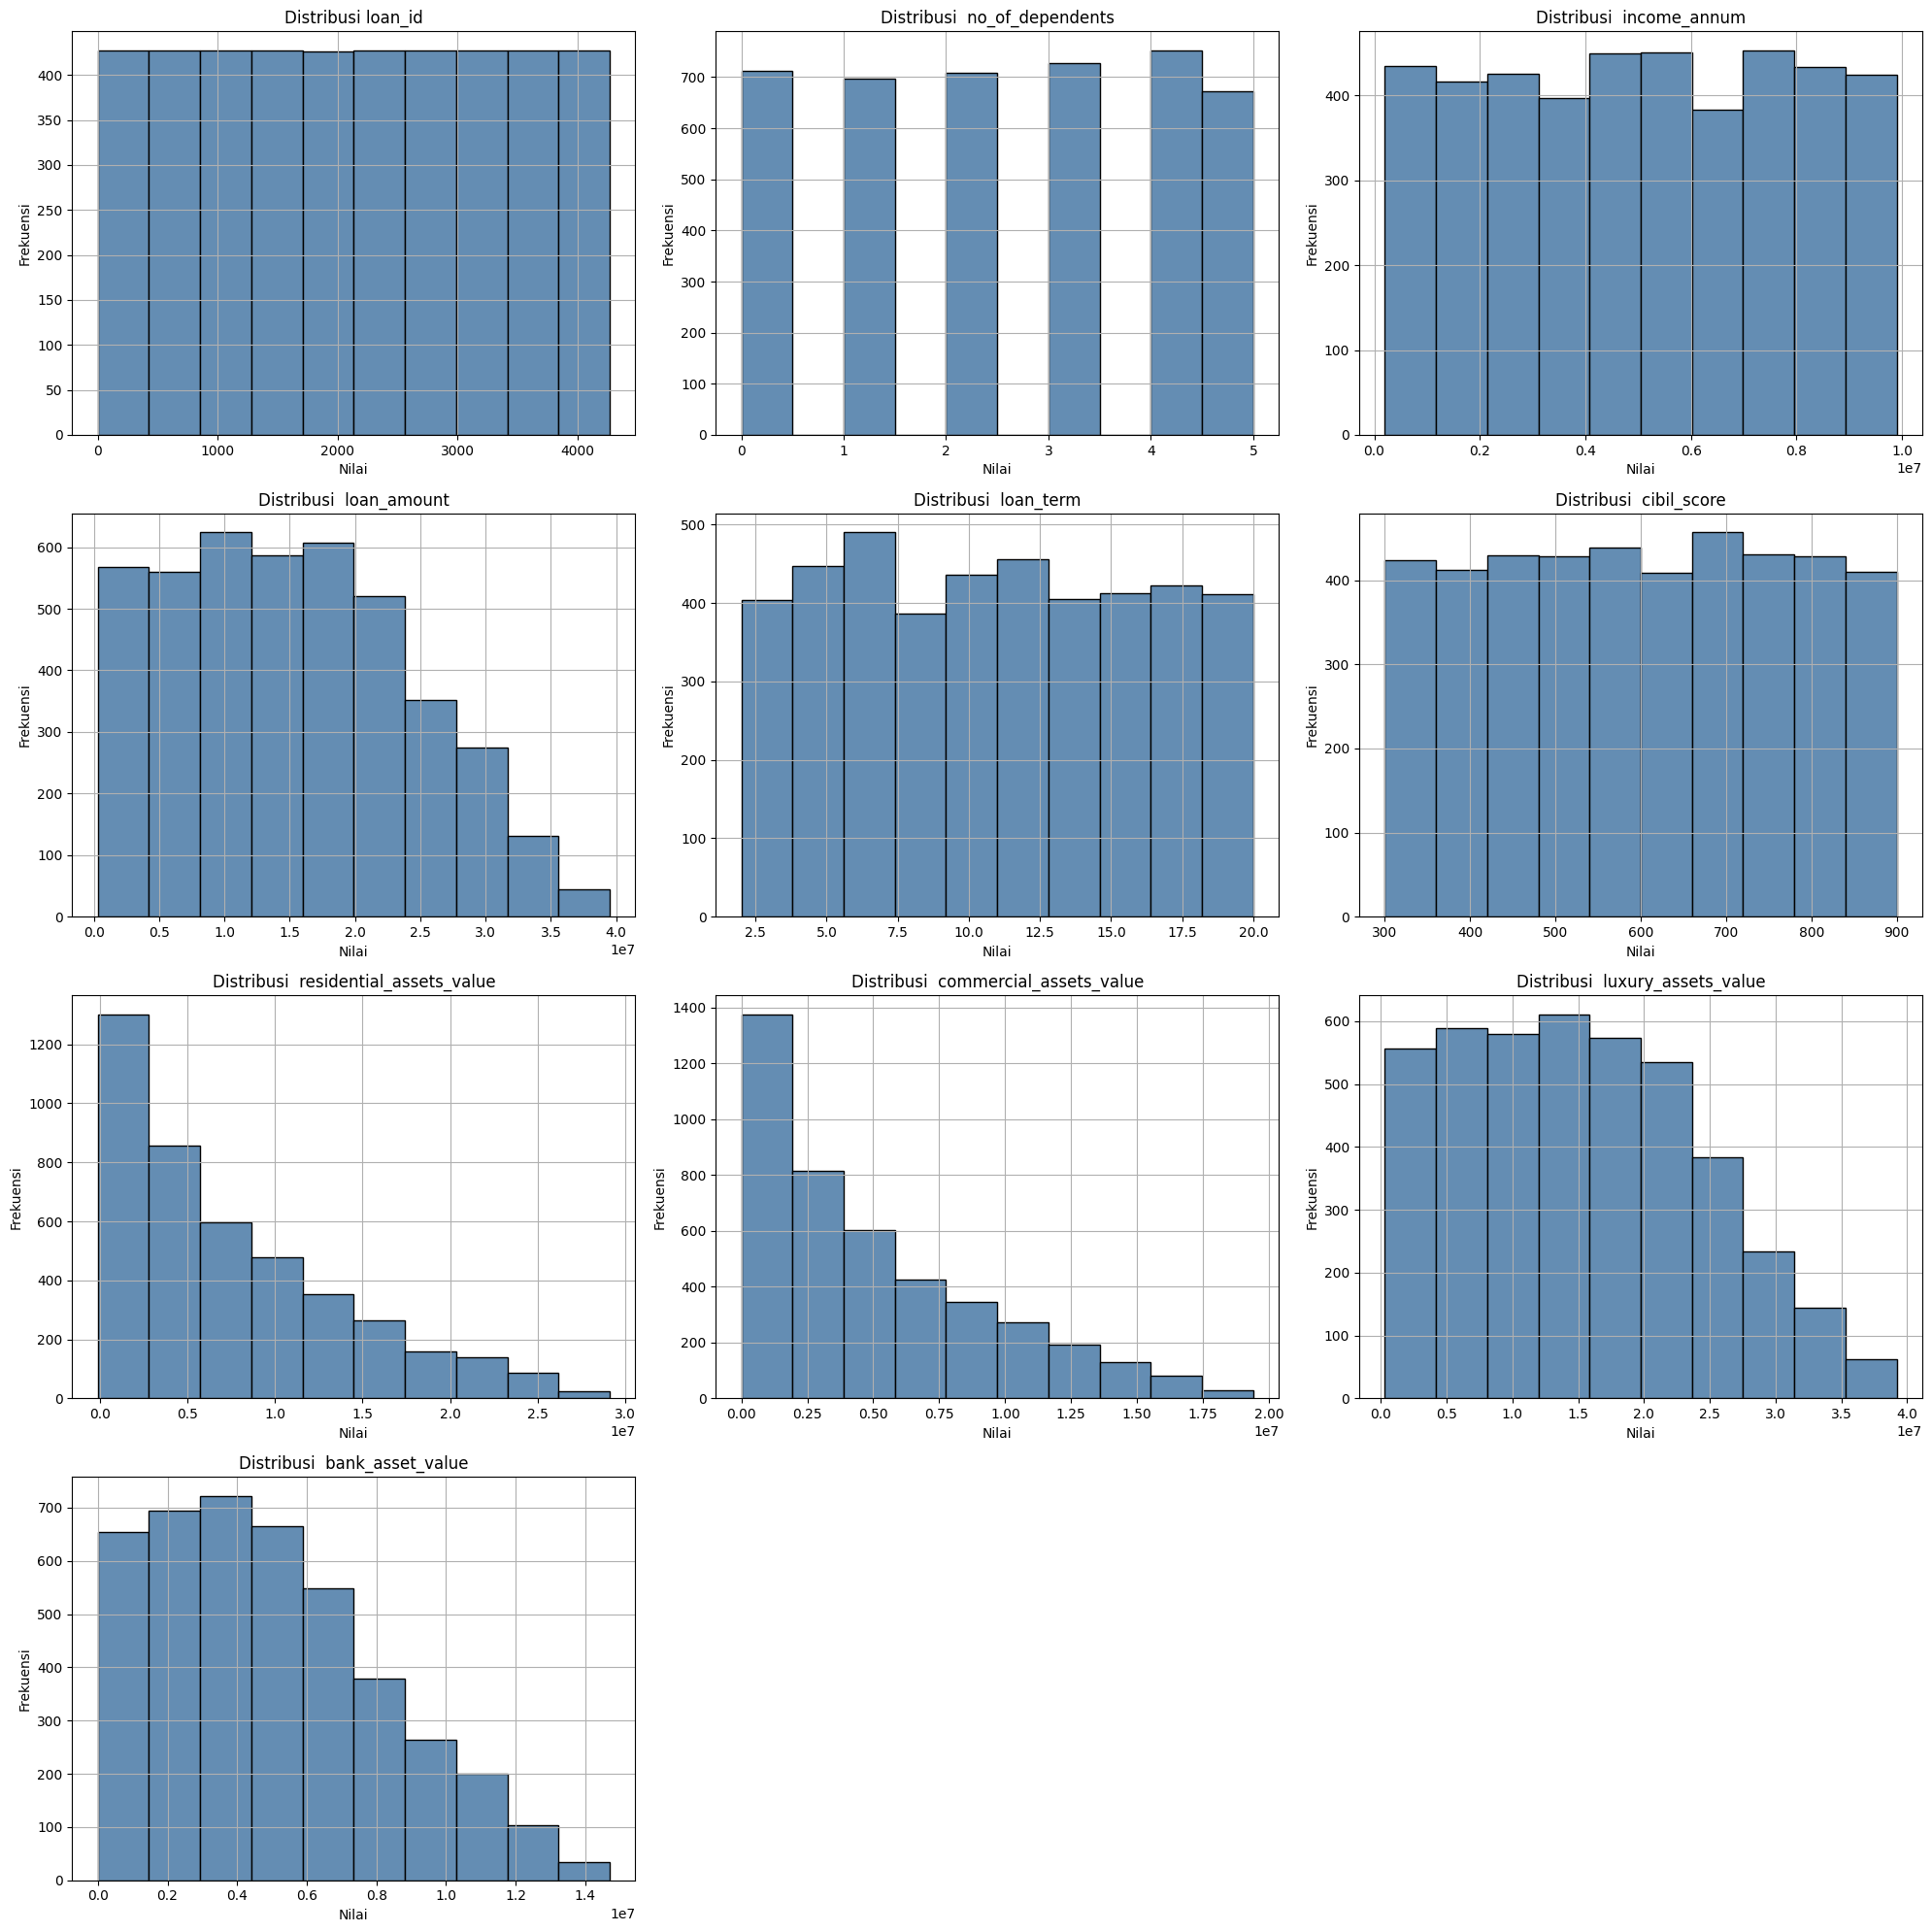

In [8]:
# Histogram distribusi persebaran data numerikal
axes = df.hist(figsize=(20, 20), color='#648DB3', edgecolor='black')

# Tambahkan label dan judul pada setiap subplot
for ax in axes.flatten():
    ax.set_xlabel("Nilai")       
    ax.set_ylabel("Frekuensi") 
    ax.set_title(f"Distribusi {ax.get_title()}")

plt.tight_layout()
plt.show()

**Insight** yang didapat dari visualisasi di atas:

- Kolom `loan_id` : Kolom load_id memiliki persebaran yang merata dikarenakan data loan_id merupakan data unik untuk setiap peminjam/ pemohon.

- Kolom `no_of_dependents` : Jumlah tanggungan terbanyak adalah 4, yang mungkin mengindikasikan banyak pemohon berasal dari keluarga yang memiliki anggota yang banyak.

- Kolom `income_annum` : Pendapatan tahunan tersebar cukup merata.

- Kolom `loan_amount` : Distribusi pada gambar lebih condong ke kanan (right-skewed) yang berarti mayoritas pinjaman berada pada kisaran jumlah kecil hingga menengah.

- Kolom `loan_term` : Durasi pinjaman cukup merata antara 2 hingga 20 bulan, yang terbanyak berada pada rentang 5 - 7 bulan.

- Kolom `cibil_score` : Skor kredit pemohon tersebar cukup merata antara sekitar 300 hingga 900, dengan sebagian besar berada di kisaran 650–700.

- Kolom `residential_assets_value`: Distribusi right-skewed: mayoritas nilai aset tempat tinggal berada pada rentang rendah (di bawah 5 juta).

- Kolom `commercial_assets_value` : Distribusi juga right-skewed: kebanyakan pemohon memiliki aset komersial dengan nilai kecil atau tidak punya sama sekali.

- Kolom `luxury_assets_value` : Pada grafik dapat dilihat pemohon yang memiliki aset mewah tersebar lebih merata, meskipun tetap menurun di rentang tinggi.

- Kolom `bank_asset_value` : Sebagian besar pemohon memiliki simpanan di bank dengan nilai antara 0.2 hingga 0.6 juta.

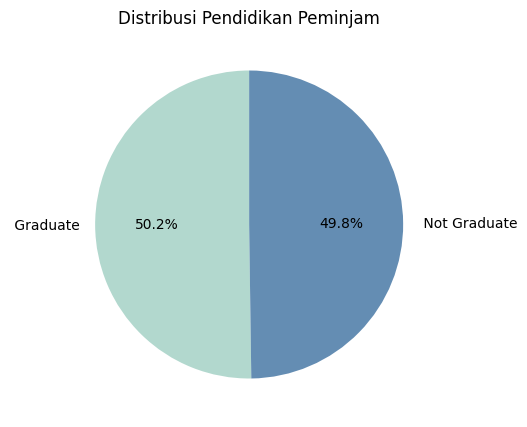

In [9]:
# Distribusi data kategorikal kolom `education`

# Menghitung frekuensi 
education_counts = df[' education'].value_counts()

# Menentukan warna untuk tiap kategori
colors = {' Graduate': '#B2D8CE', ' Not Graduate': '#648DB3'} 

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    education_counts,
    labels= education_counts.index, # type: ignore
    autopct='%1.1f%%',
    colors=[colors[label] for label in education_counts.index],
    startangle=90
)
plt.title('Distribusi Pendidikan Peminjam')
plt.show()

Dari grafik di atas dapat dilihat bahwa distribusi pendidikan dari peminjam cukup seimbang dimana 50,2% Lulus dan 49,8% Tidak Lulus.

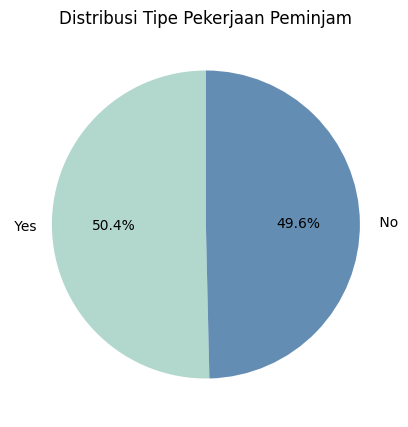

In [10]:
# Distribusi data kategorikal kolom `self_employed`

# Menghitung frekuensi 
employed_counts = df[' self_employed'].value_counts()

# Menentukan warna untuk tiap kategori
colors = {' Yes': '#B2D8CE', ' No': '#648DB3'}

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    employed_counts,
    labels= employed_counts.index, # type: ignore
    autopct='%1.1f%%',
    colors=[colors[label] for label in employed_counts.index],
    startangle=90
)
plt.title('Distribusi Tipe Pekerjaan Peminjam')
plt.show()

Dari grafik di atas dapat dilihat bahwa distribusi tipe pekerjaan dari peminjam cukup seimbang dimana 50,4% merupakan wiraswasta dan 49,6% merupakan pegawai.

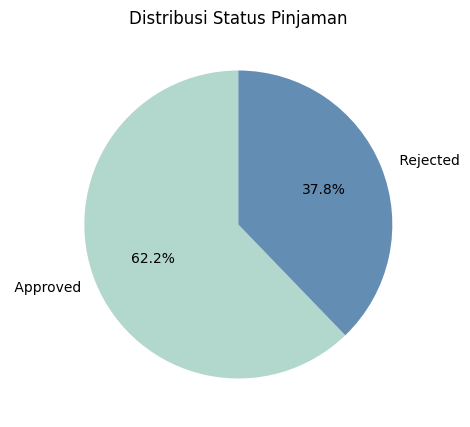

In [11]:
# Distribusi data kategorikal kolom `loan_status`

# Menghitung frekuensi 
status_counts = df[' loan_status'].value_counts()

# Menentukan warna untuk tiap kategori
colors = {' Approved': '#B2D8CE', ' Rejected': '#648DB3'}

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    status_counts,
    labels= status_counts.index, # type: ignore
    autopct='%1.1f%%',
    colors=[colors[label] for label in status_counts.index],
    startangle=90
)
plt.title('Distribusi Status Pinjaman')
plt.show()

Dari grafik di atas dapat dilihat bahwa distribusi status pinjaman tidak seimbang dimana 62,2% pinjaman disetujui dan 37,8% ditolak.

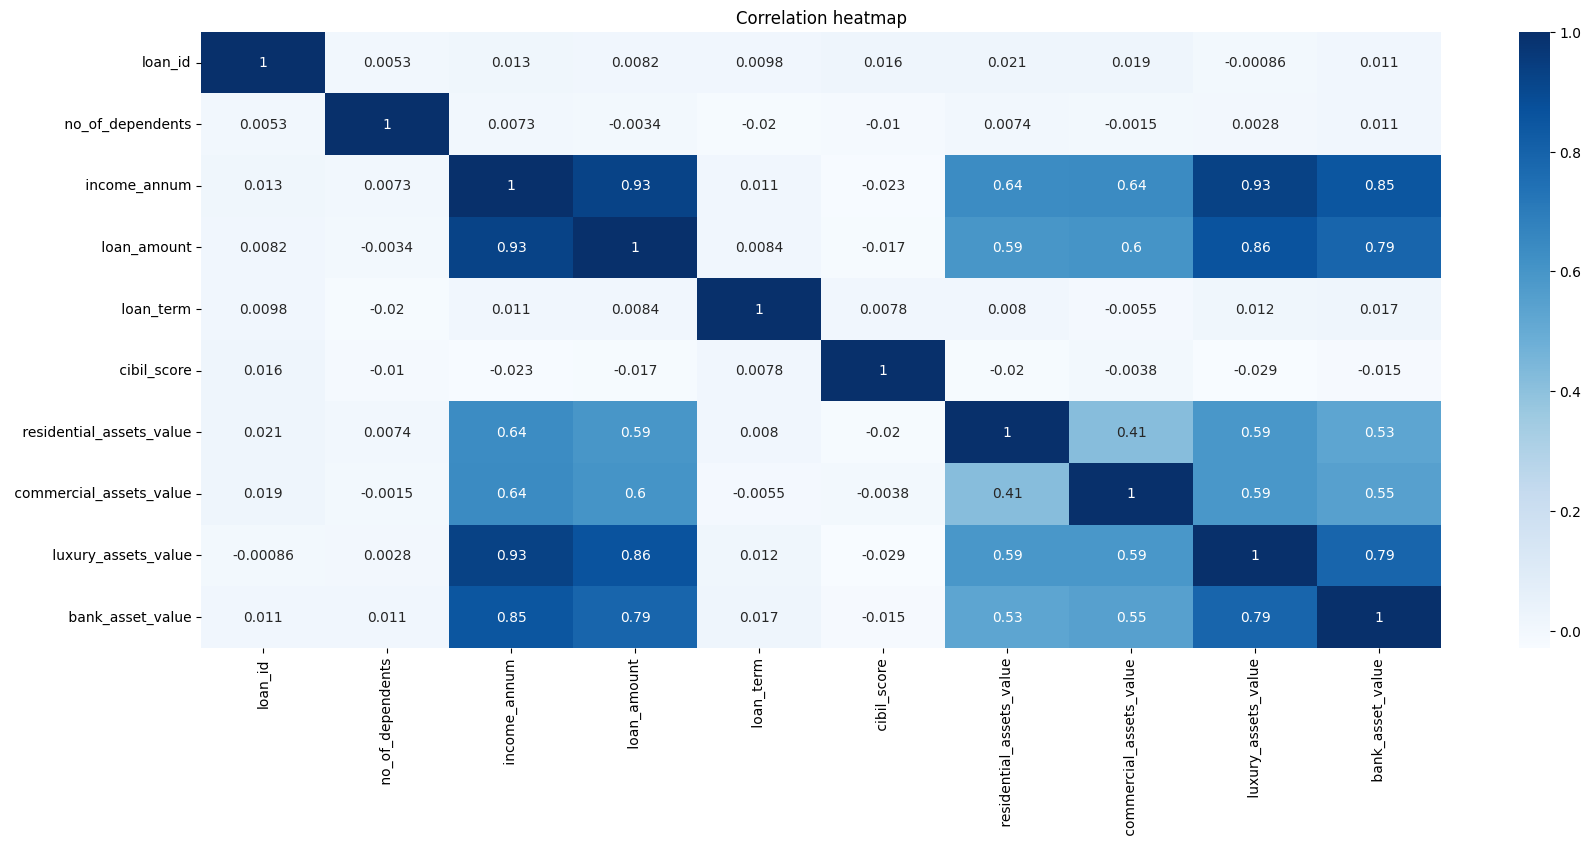

In [12]:
# visualisasi korelasi matriks

# mengambil data numerik
data_numerik = df.select_dtypes(include=['int64']).copy()

# menghitung korelasi matriks
cor = data_numerik.corr()

# menampilkan grafik korelasi
plt.figure(figsize=(20,8))
sns.heatmap(cor,annot=True,cmap='Blues')
plt.title('Correlation heatmap')
plt.show()

**Insight** yang didapat dari visualisasi di atas:

- Kolom `income_annum` dengan kolom `loan_amount` dan kolom `luxury_assets_value` memiliki korelasi yang sangat tinggi yaitu 0.93. Hal ini menandakan bahwa semakin tinggi pendapat tahunan dari seorang peminjam, semakin besar juga jumlah pinjaman dan aset barang mewahnya. Kolom `income_annum` juga memiliki korelasi yang cukup tinggi dengan kolom nilai aset yang lain seperti `residential_assets_value`, `commercial_assets_value``, dan bank_asset_value`.

- Selain dengan kolom `income_annum`, kolom `loan_amount` juga memiliki nilai korelasi yang cukup tinggi dengan kolom-kolom nilai aset. Hal ini menandakan bahwa peminjam dengan jumlah pinjaman yang besar umumnya juga memiliki aset yang lebih banyak atau bernilai tinggi.

- Nilai pada masing-masing kolom aset (`residential_assets_value`, `commercial_assets_value`, `luxury_assets_value`, dan `bank_asset_value`) juga saling berkorelasi cukup tinggi satu sama lain. Hal ini mengindikasikan bahwa peminjam yang memiliki satu jenis aset dalam jumlah besar cenderung memiliki jenis aset lainnya dalam jumlah besar juga.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
# Penghapusan kolom loan_id
df_clean = df.drop(columns = 'loan_id')

df_clean.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Penghapusan kolom dilakukan karena `loan_id` merupakan kolom unik yang memiliki nomor ID pinjaman dan tidak memiliki pola pada datanya.

In [14]:
# Menghapus whitespace pada nama kolom dan pada data bertipe object

# Menghapus whitespace dari nama kolom
df_clean.columns = df_clean.columns.str.strip()

# Menghapus whitespace dari nilai string (object)
df_obj = df_clean.select_dtypes(include='object')
df_clean[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [15]:
# Normalisasi data numerik

data_numerik = df_clean.select_dtypes(include=['int64'])
data_numerik = data_numerik.columns.tolist()

# Inisialisasi dan fit-transform
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_clean[data_numerik])

# Mennggabungkan kembali ke dataframe
scaled_df = pd.DataFrame(scaled_array, columns=data_numerik, index=df_clean.index)
df_clean[data_numerik] = scaled_df

df_clean.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.294102,Graduate,No,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,Approved
1,-1.473548,Not Graduate,Yes,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,Rejected
2,0.295621,Graduate,No,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,Rejected
3,0.295621,Graduate,No,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,Rejected
4,1.475067,Not Graduate,Yes,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,Rejected


In [16]:
# Mapping data kategorikal
df_clean['education'] = df_clean['education'].map({'Graduate': 1, 'Not Graduate': 0})
df_clean['self_employed'] = df_clean['self_employed'].map({'Yes': 1, 'No': 0})
df_clean['loan_status'] = df_clean['loan_status'].map({'Approved': 1, 'Rejected': 0})

df_clean.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.294102,1,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1
1,-1.473548,0,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0
2,0.295621,1,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,0
3,0.295621,1,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,0
4,1.475067,0,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0


In [24]:
# Menyimpan data preprocessing ke dalam csv
df_clean.to_csv('loan_preprocessing.csv', index=False)
print('Data berhasil disimpan !')

Data berhasil disimpan !
